# Lab:  Feature Selection for Linear Regression for Student Performance Data  

In this lab we use the UCI dataset of `Student Performance` to use linear regression with LASSO regularization. We will also look at some Feature Selection methods. The dataset is about student achievement in secondary education of two Portuguese schools. The target variable is the student's grade in their Mathematics exam and there are many features such as  demographic (address), social (family, age, sex, etc) and school related (schoolName, study time etc) features. So, we will try to predict the student's grades based on their background.

This lab has the following objectives

1. Learn about converting the categorical dataset to numerical values.
2. Perform LASSO regression and compare the results with simple linear regression.
3. Visualize the features obtained by LASSO and the LASSO path.
4. Learn another technique for feature selection.

## Loading the data
The dataset is available at 
<a href = "https://archive.ics.uci.edu/ml/datasets/Student+Performance">
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. </a>

You need to download the Data Folder which is a `student.zip` file. It contains `student-mat.csv` file which we will use in this lab. You should go through the website to understand the meaning of each feature in the dataset, to be able to interpret your results.

We start with loading the basic packages.

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Now, use `pd.read_csv(...)` to load the `student-mat.csv` file. Also, print the first 6 samples of dataframe `df`.

In [2]:
#TODO
df = pd.read_csv('student/student-mat.csv', sep = ';')
df.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15


You can see that the dataset contains a mixture of numerical and categorial features. For our analysis we can convert the categories to a numerical value. We can use two techniques-

1. **One-Hot Coding**: Create K new binary features for each categorical feature with K categories.
2. **Label Encoder**: Map categorical values of a feature to numericals using whole numbers (0,1,2,...).

We first look at the datatype of each features. Use the command `df.dtypes` and display the results.


In [3]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Some of the features are of datatype **object**. Use the `select_dtypes` method in Pandas DataFrame to identify the categorical features (features of datatype `object`) and save the name of those features into a list `categorical_features`. Print this list. You should get these set of features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [4]:
#TODO

categorical_features = np.array(df.select_dtypes(include=object).axes[1]).tolist()
print(categorical_features)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## One-Hot Coding and Label Encoder
For a categorical feature with more than two categories, we should use one-hot-coding (OHC) to convert it to binary features. However, for a categorical feature with only two categories, we should apply Label Encoder.  We first list the features that need OHC and those that need Label Encoder.





In [5]:
ohc_category = ['Mjob','Fjob','reason','guardian']
le_category = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

## One-Hot Coding
We first use One-Hot Coding to all categorical features. Pandas has a method called `get_dummies()` to do the job. It's interesting that this method is called `get_dummies` because it generates new dummy features corresponding to each categories. Find a new dataframe df_ohc which replace those features in the ohc_category by one-hot coding (apply get_dummies on columns in ohc_category). Also print the first 6 samples of the new dataframe `df_ohc`, and observe and comment on how each categorical feature is converted to multiple binary numerical features.

In [6]:
#TODO
df_ohc = df.drop(ohc_category, axis=1).join(pd.get_dummies(df[ohc_category]))
df_ohc.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
5,GP,M,16,U,LE3,T,4,3,1,2,...,1,0,0,0,0,0,1,0,1,0


## Linear Encoder
Now we further convert those in the `df_ohc` data frame that are in the `le_category` using Label Encoder. Find a new dataframe `df_le` which is a copy of dataframe `df_ohc` except that all the binary categorial features are encoded to a numerical value of 0 or 1. You should use the `fit_transform()` method of the `LabelEncoder()`. Print first 6 lines of `df_le`, and make sure the entries in the final data frame are all properly encoded into numerical features.


In [7]:
from sklearn.preprocessing import LabelEncoder

#TODO

df_le = df_ohc.copy()

# Hint: Now use a for loop over the elements in `le_category` and update df_le
for cat in le_category:
    le = LabelEncoder()
    le.fit(np.array(df_le[cat]))
    df_le[cat] = le.transform(df_le[cat])
df_le.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
5,0,1,16,1,1,1,4,3,1,2,...,1,0,0,0,0,0,1,0,1,0


The dataset has three targets namely G1, G2, and G3 which represents the grades in midterm1, midterm2 and final exams respectively. These variables are highly correlated with each other and therefore, if we use G3 as out target, it is not interesting to include G1 and G2 to our features. For our exercise, we will drop G1,G2, and G3 from the feature list, and use G1 as the target. You could try to use G2 or G3 as the target as well and see what happens, but submit the results with target 'G1' only.  

In [8]:
X_df = df_le.drop(['G1','G2','G3'],axis=1)
col_names = X_df.columns
X = np.array(X_df)
y = np.array(df_le['G1'])

If there are `nsamples` number of samples and `nfeatures` number of features, use the `shape` method to find them and print their values.

In [9]:
# TODO 
(nsamples, nfeatures) = X.shape
print("There are %d number of samples and %d number of features." % (nsamples, nfeatures))

There are 395 number of samples and 43 number of features.


## Using Linear Regression

Train a linear model using half of the samples and test the trained model using the other half samples. Print the Normalized train and test RSS.

In [10]:
from sklearn import linear_model

# TODO
ns_train = nsamples // 2
ns_test = nsamples - ns_train
Xtr = X[:ns_train]
ytr = y[:ns_train]
Xts = X[ns_train:]
yts = y[ns_train:]

regr = linear_model.LinearRegression()
regr.fit(Xtr, ytr)

y_train = regr.predict(Xtr)
train_RSS = np.mean((y_train - ytr) ** 2) / (np.std(ytr) ** 2) 
print("Normalized train RSS is %f." % train_RSS)

y_test = regr.predict(Xts)
test_RSS = np.mean((y_test - yts) ** 2) / (np.std(yts) ** 2) 
print("Normalized test RSS is %f." % test_RSS)

Normalized train RSS is 0.514120.
Normalized test RSS is 1.078027.


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


You should observe that the normalized training RSS is reasonably small, but the testing error is large! One way to understand why this is the case is by printing the coeffcient values. Use the
`coef_` method of model `regr` to get the regression coefficients. Print the coefficients in decreasing order of their magnitudes.

In [11]:
#TODO
print(regr.coef_[np.argsort(-np.abs(regr.coef_))])

[-2.42018633  1.41322947  1.34876693 -1.32217565 -1.0878967  -1.05166117
 -0.9709538   0.91049692  0.88398883  0.70133622 -0.65949467  0.58617418
 -0.55594619 -0.54087673  0.51415568 -0.50054604  0.49041546 -0.47882562
 -0.42154072  0.39086244 -0.35560053  0.33424881  0.30750373 -0.30368204
 -0.2691571   0.25833785  0.24584255 -0.23744384 -0.21326584  0.19538738
 -0.18054761  0.15443934  0.133797    0.12218268 -0.11549284  0.09108316
  0.08933163  0.08793535  0.07634628 -0.02057175 -0.01289411 -0.01243405
  0.        ]


#### Question:
Can you explain in one or two sentences below why the linear regression gives a large test error?

#### Type Answer Here:

Because there are too many features, i.e. there occurs an underfitting.

## Using LASSO regression

Now let us try to use LASSO regression to select the optimal features. Note that it is extremely important to normalize (standardize) the data for the regularization methods. 

First use the `preprocessing.scale` method to standardize the data matrix `X` and target `y`.  Store the standardized values in `Xs` and `ys` respectively.    For this data, the `scale` routine may throw a warning that you are converting data types.  That is fine.

In [12]:
from sklearn import preprocessing

# TODO
Xs = preprocessing.scale(X)
ys = preprocessing.scale(y)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Now, use the LASSO method to fit a model.  Use cross validation to select the regularization level `alpha`.  Use 100 `alpha` values logarithmically spaced from `1e-3` to `10`, and use 10 fold cross validation.  Store the test RSS in a matrix `RSSts` with rows correponding to different `alpha` values and columns corresponding to different cross validation folds. 

In [13]:
import  sklearn.model_selection 

#TODO
# Create a k-fold object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)

# Create the LASSO model.  We use the `warm start` parameter so that the fit will start at the previous value.
# This speeds up the fitting.
model = linear_model.Lasso(warm_start=True)

# Regularization values to test
nalpha = 100
alphas = np.logspace(-3,1,nalpha)

# MSE for each alpha and fold value
RSSts = np.zeros((nalpha,nfold))

for ifold, ind in enumerate(kf.split(X)):
    
    # Get the training data in the split
    Itr, Its = ind
    X_tr = Xs[Itr,:]
    y_tr = ys[Itr]
    X_ts = Xs[Its,:]
    y_ts = ys[Its]
    
    # Compute the lasso path for the split
    for ia, a in enumerate(alphas):
        
        # Fit the model on the training data
        model.alpha = a
        model.fit(X_tr, y_tr)
        
        # Compute the prediction error on the test data
        y_ts_pred = model.predict(X_ts)
        RSSts[ia, ifold] = np.mean((y_ts_pred - y_ts) ** 2) / (np.std(y_ts) ** 2)

Determine the RSS mean and standard error corresponding to different alpha and plot the mean RSS with error bar as a function of alpha. Label the axis.

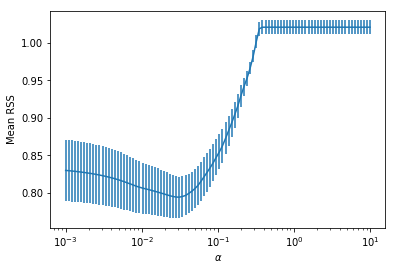

In [14]:
# TODO
RSS_mean = np.mean(RSSts, axis=1)
RSS_std = np.std(RSSts, axis=1) / np.sqrt(nfold - 1)
plt.semilogx()
plt.errorbar(alphas, RSS_mean, yerr=RSS_std, fmt='-')
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean RSS')
plt.show()

Find the optimal `alpha` and the mean test RSS at this optimal point using the one standard error rule.

Optimal alpha = 0.065793


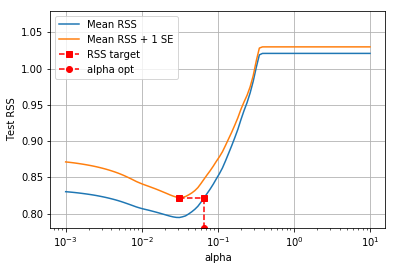

In [15]:
# TO DO
# Find the minimum MSE and MSE target
imin = np.argmin(RSS_mean)
RSS_tgt = RSS_mean[imin] + RSS_std[imin]
alpha_min = alphas[imin]

# Find the least complex model with mse_mean < mse_tgt
I = np.where(RSS_mean < RSS_tgt)[0]
iopt = I[-1]
alpha_opt = alphas[iopt]
print("Optimal alpha = %f" % alpha_opt)

# Plot the mean MSE and the mean MSE + 1 std dev
plt.semilogx(alphas, RSS_mean)
plt.semilogx(alphas, RSS_mean+RSS_std)

# Plot the MSE target
plt.semilogx([alpha_min, alpha_opt], [RSS_tgt, RSS_tgt], 'rs--')

# Plot the optimal alpha line
plt.semilogx([alpha_opt, alpha_opt], [0.78, RSS_mean[iopt]], 'ro--')

plt.legend(['Mean RSS', 'Mean RSS + 1 SE', 'RSS target', 'alpha opt'], loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test RSS')
plt.ylim([0.78, 1.08])
plt.grid()
plt.show()

## LASSO path

To further illustrate the effect of regularization, we conclude by drawing the *LASSO path*.  This is simply a plot of the coefficients as a function of the regularization `alpha`. The path demonstrates the effect of regularization well. Use the `lasso_path` method to obtain all the coefficients for the given range of alphas and plot the LASSO path. Also draw a vertical line at optimal value of alpha.

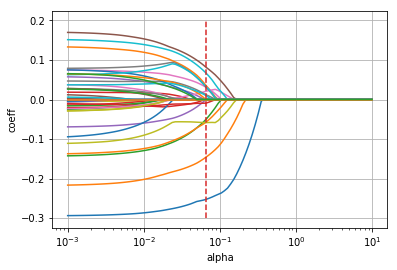

In [16]:
# TODO
alphas1, coeffs, _ = sklearn.linear_model.lasso_path(Xs, ys, alphas=alphas)

# Plot the paths of the coefficients
plt.semilogx(alphas1, coeffs.T)
plt.grid()
#plt.legend(col_names, loc='upper right')


# Plot a line on the optimal alpha
plt.semilogx([alpha_opt, alpha_opt], [-0.3,0.2], '--')
plt.xlabel('alpha')
plt.ylabel('coeff')
plt.show()

### Non-zero LASSO Coefficients
Using the above coefficients, Plot the number of non-zero coefficients vs alpha. Also draw a vertical line at optimal value of alpha. You can assume any coefficients with magnitude <= 0.001 to be zero.

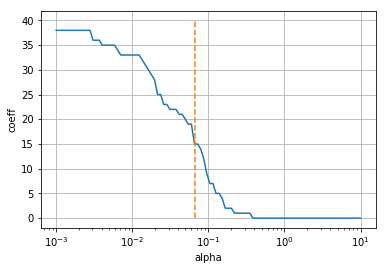

In [17]:
# TODO

# Plot the numbers of the non-zero coefficients
plt.semilogx(alphas1, np.sum(np.abs(coeffs) > 0.001, axis=0))
plt.grid()

# Plot a line on the optimal alpha
plt.semilogx([alpha_opt, alpha_opt], [0,40], '--')
plt.xlabel('alpha')
plt.ylabel('coeff')
plt.show()

Let us now find out with this optimal alpha, what coefficients are nonzero. Let us consider any coefficients with absoluate value <= 0.001 as zero. You need to first do a model fit using the entire data (`Xs`, `ys`) to find the model coefficients. Then determine and **print** the number of nonzeros (Call it `nfea1`). Finally, **print** the corresponding feature name (Hint: use the list `col_names` obtained previously) with their corresponding coefficient in the order with decreasing coefficient magnitudes.

In [18]:
#TO DO

#First do a model fit using alpha_opt
model = linear_model.Lasso(warm_start=True)
model.alpha = alpha_opt
model.fit(Xs, ys)

# Find model coefficients that are >0.001 and count
nfea1 = np.sum(np.abs(model.coef_) > 0.001)
print('The number of nonzeros is %d.' % nfea1)

# Sort the coeffients in decreasing order and print. 
sorted_coeff = np.argsort(-np.abs(model.coef_))
print('The corresponding feature names and their corresponding coefficients are as follows.')
print('%-20s% s' % ('FEATURE NAMES', 'COEFFICIENTS'))
for i in sorted_coeff:
    print('%-20s% f' % (col_names[i], model.coef_[i]))


The number of nonzeros is 15.
The corresponding feature names and their corresponding coefficients are as follows.
FEATURE NAMES       COEFFICIENTS
failures            -0.252643
schoolsup           -0.145763
Fjob_teacher         0.081575
studytime            0.066901
Mjob_other          -0.058465
goout               -0.057220
famsup              -0.050161
sex                  0.035477
Mjob_services        0.032373
Mjob_health          0.031101
higher               0.030990
Medu                 0.020936
Fedu                 0.012106
reason_reputation    0.010079
Fjob_other          -0.009195
guardian_father      0.000000
Mjob_at_home        -0.000000
Fjob_health          0.000000
Fjob_at_home         0.000000
Mjob_teacher        -0.000000
reason_other        -0.000000
reason_home          0.000000
reason_course       -0.000000
Fjob_services       -0.000000
absences             0.000000
school              -0.000000
Walc                -0.000000
age                 -0.000000
address     

#### Question:
Observe the coefficient values carefully. Do they make sense to you? Do you see positive coefficients for features that you think  are likely to increase student performance, and vice versa? Put your answer below. You may need to consult the original datasource, to understand the meaning of each chosen feature.


#### Type answer here:

They do not make sense to me. 

For example, I thought the sex should have no effect on the student performance, while the corresponding coefficient is non-zero. In the other hand, the school and absences seems to have no influence on the student performance, which is weird.

# Determine linear predictor with the selected features using the optimal alpha

Note that we cannot use the coefficients determined above as is as our predictor, as it is fitted using all data. Also it obtained by minimizing the LASSO loss. With the selected features, we now go through a 10 fold cross validation to determine the predictor coefficients and the estimated test error using the **linear regression** directly.

First get new feature array only containing these chosen features and name it *X_new*. Print a few lines to make sure that you got the data correctly.

Note: You can convert the dataframe into numpy array using `np.array(...)`

In [19]:
# TO DO
col_names_new = col_names[np.abs(model.coef_) > 0.001]
X_new = np.array(X_df[col_names_new])
print(X_new[0:6])

[[0 4 4 2 0 1 0 1 4 0 0 0 0 1 0]
 [0 1 1 2 0 0 1 1 3 0 0 0 1 0 0]
 [0 1 1 2 3 1 0 1 2 0 0 0 1 0 0]
 [0 4 2 3 0 0 1 1 2 1 0 0 0 0 0]
 [0 3 3 2 0 0 1 1 2 0 1 0 1 0 0]
 [1 4 3 2 0 0 1 1 2 0 0 1 1 0 1]]


Now compute the mean predictor coefficients and mean test error using 10 fold cross validation. For this part, you can use the linear predictor on the original features (not scaled) directly, or using the scaled data. Using the scaled data enables you to judge the importance of featurs based on the coefficient magnitude. Therefore let us use scaled data. 

Store the mean coefficients in `coeff_mean` and the mean intercept in `intercept_mean`. Print them along with the feature names. Also print the mean and std of RSS.

Hint: Get the intercept using `regr.intercept_` attribute.

In [20]:
# Scale the data
Xs_new = preprocessing.scale(X_new)

# TODO
# 10 fold CV using the linear regression model to find the RSS and coef using each fold 

# Hint: First set up arrays to store the test errors and coefficients then go through a loop of 10 folds

from IPython.display import clear_output

# Create a k-fold object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle=True)

# Model orders to be tested
RSSts = np.zeros((nfold, 1))
coef = np.zeros((nfold, nfea1))
intercept = np.zeros((nfold, 1))

# Loop over the folds
for ifold, ind in enumerate(kf.split(Xs_new)):
    # Print loading
    i = round(ifold / nfold * 100)
    load_str = '>' * (i // 2) + ' ' * ((99 - i) // 2)
    clear_output(wait=True)
    print('\r' + load_str + '[%s%%]' % i)
    
    # Get the training data in the split
    Itr, Its = ind
    
    #kf.split( ) returns Ind, which contains the indices to the training and testing d 
    X_tr = Xs_new[Itr]
    y_tr = ys[Itr]
    X_ts = Xs_new[Its]
    y_ts = ys[Its]
    
    regr.fit(X_tr, y_tr)
    y_ts_pred = regr.predict(X_ts)
    RSSts[ifold] = np.mean((y_ts_pred - y_ts) ** 2) / (np.std(y_ts) ** 2)
    coef[ifold] = regr.coef_
    intercept[ifold] = regr.intercept_
    
coef_mean = np.mean(coef, axis=0)
intercept_mean = np.mean(intercept, axis=0)

clear_output()
print('Done!')

print('%-20s%-20s' % ('FEATURE NAMES', 'COEFFICIENTS MEAN'))
for i in range(nfea1):
    print('%-20s% .6f' % (col_names_new[i], coef_mean[i]))
print('The mean of intercept is %f.' % intercept_mean)
print('The mean of RSS is %f.' % np.mean(RSSts))
print('The std of RSS is %f.' % np.std(RSSts))

Done!
FEATURE NAMES       COEFFICIENTS MEAN   
sex                  0.124920
Medu                 0.004095
Fedu                 0.049071
studytime            0.151906
failures            -0.281982
schoolsup           -0.205576
famsup              -0.143570
higher               0.081456
goout               -0.124690
Mjob_health          0.116241
Mjob_other          -0.061608
Mjob_services        0.116099
Fjob_other          -0.037186
Fjob_teacher         0.141587
reason_reputation    0.065919
The mean of intercept is 0.000275.
The mean of RSS is 0.775050.
The std of RSS is 0.147311.


Using the **mean predictor** above, compute the predicted response variable on the whole data (`Xs_new`). Plot the predicted vs. actual values. Also show a line of 45 degree slope. Also print the normalized RSS.

Hint: Use $\hat{y} = Xs_{new}\beta+\beta_0$, where $\beta$ is the vector `coef_mean` and $\beta_0$ is `intercept_mean`.

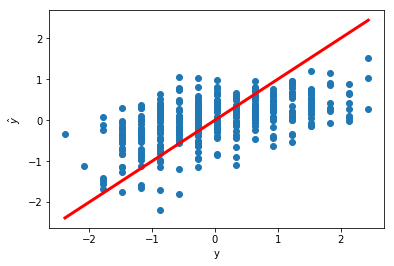

In [21]:
# TO DO
# Compute the response and plot

yhat = np.dot(Xs_new, coef_mean) + intercept_mean

plt.scatter(ys, yhat)
plt.xlabel('y')
plt.ylabel(r'$\hat{y}$')
ymin = np.min(ys)
ymax = np.max(ys)
plt.plot([ymin, ymax], [ymin, ymax], 'r-', linewidth=3)
plt.show()

# Feature Ranking based on F-test and mutual information 

Rank all the original features (`Xs`) using f-test metric. Print first *nfea1* top ranked feature names. If you wish, you could try other metrics as well (e.g. mutual information). 

In [22]:
from sklearn.feature_selection import f_regression

# TO DO

f_test, _ = f_regression(Xs, ys)
f_test /= np.max(f_test)

col_names_f = np.array(col_names[np.argsort(-f_test)[0:nfea1]])
print(col_names_f)

['failures' 'schoolsup' 'Medu' 'Fedu' 'higher' 'Fjob_teacher' 'Mjob_other'
 'studytime' 'goout' 'Walc' 'Mjob_health' 'Fjob_other' 'reason_reputation'
 'Dalc' 'traveltime']


### Test Error with f_test
Take the top ranked *nfea1* features, apply linear regression fit in cross validation to find the test error, to see how they compare with LASSO result.

In [23]:
# TO DO
X_f = np.array(X_df[col_names_f])
# Scale the data
Xs_f = preprocessing.scale(X_f)

# 10 fold CV using the linear regression model to find the RSS and coef using each fold 

# Hint: First set up arrays to store the test errors and coefficients then go through a loop of 10 folds

from IPython.display import clear_output

# Create a k-fold object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold, shuffle=True)

# Model orders to be tested
RSSts = np.zeros((nfold, 1))
coef = np.zeros((nfold, nfea1))
intercept = np.zeros((nfold, 1))

# Loop over the folds
for ifold, ind in enumerate(kf.split(Xs_new)):
    # Print loading
    i = round(ifold / nfold * 100)
    load_str = '>' * (i // 2) + ' ' * ((99 - i) // 2)
    clear_output(wait=True)
    print('\r' + load_str + '[%s%%]' % i)
    
    # Get the training data in the split
    Itr, Its = ind
    
    #kf.split( ) returns Ind, which contains the indices to the training and testing d 
    X_tr = Xs_f[Itr]
    y_tr = ys[Itr]
    X_ts = Xs_f[Its]
    y_ts = ys[Its]
    
    regr.fit(X_tr, y_tr)
    y_ts_pred = regr.predict(X_ts)
    RSSts[ifold] = np.mean((y_ts_pred - y_ts) ** 2) / (np.std(y_ts) ** 2)
    coef[ifold] = regr.coef_
    intercept[ifold] = regr.intercept_
    
coef_mean = np.mean(coef, axis=0)
intercept_mean = np.mean(intercept, axis=0)

clear_output()
print('Done!')

print('%-20s%-20s' % ('FEATURE NAMES', 'COEFFICIENTS MEAN'))
for i in range(nfea1):
    print('%-20s% .6f' % (col_names_new[i], coef_mean[i]))
print('The mean of intercept is %f.' % intercept_mean)
print('The mean of RSS is %f.' % np.mean(RSSts))
print('The std of RSS is %f.' % np.std(RSSts))

Done!
FEATURE NAMES       COEFFICIENTS MEAN   
sex                 -0.278358
Medu                -0.229665
Fedu                 0.014263
studytime            0.018558
failures             0.067177
schoolsup            0.135673
famsup              -0.107479
higher               0.091371
goout               -0.108031
Mjob_health         -0.023344
Mjob_other           0.065759
Mjob_services       -0.045052
Fjob_other           0.059431
Fjob_teacher         0.019548
reason_reputation   -0.030541
The mean of intercept is -0.000207.
The mean of RSS is 0.794210.
The std of RSS is 0.063465.


#### Question:
Comment on the features choosen, their corresponding coefficient values, and the test error, in contrast to those obtained with LASSO. Explain why the feature ranking method is generally not as effective as LASSO.

#### Type answer here: 

The feature ranking based on F-test is a kind of univariate feature selection. It can only estimate the degree of linear dependency between two random variables. However, LASSO consider several random variables at the same time. So it will have a better result with an optimal $\alpha$.

### Test error with MI (Optional)
Similarly obtain the test error with MI and compare with LASSO and f_test.
